In [1]:
# Install packages
# %pip install networkx
# %pip install numpy
# %pip install tqdm
# %pip install matplotlib

In [13]:
# The starter code is short and simple, take a look!
from starter import *
from solve_ import *
from solve_1 import *
from solve_2 import *
from solve_2hard import *
from solve_clean import *
# from greedy import *
# from solve_sa import *
# from simulated_annealing import *
import random

# Phase 1 - Create Inputs

In [14]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    sum_weights = 0
    start, end = 0, 1
    while sum_weights < 500000:
        add = 1000
        G.add_edge(start, end, weight=add)
        sum_weights += add
        start += 1
        end += 1
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    sum_weights = 0
    start, end = 0, 1
    while sum_weights < 500000:
        add = 500
        G.add_edge(start, end, weight=add)
        sum_weights += add
        start += 1
        end += 1

    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    sum_weights = 0
    start, end = 0, 1
    while sum_weights < 500000:
        add = 250
        G.add_edge(start, end, weight=add)
        sum_weights += add
        start += 1
        end += 1

def test(G: nx.Graph):
    G.add_edge(0, 1, weight=random.randint(1, 1000))
    G.add_edge(0, 3, weight=random.randint(1, 1000))
    G.add_edge(1, 2, weight=random.randint(1, 1000))
    G.add_edge(1, 3, weight=random.randint(1, 1000))
    G.add_edge(2, 3, weight=random.randint(1, 1000))
    G.add_edge(2, 4, weight=random.randint(1, 1000))
    G.add_edge(2, 5, weight=random.randint(1, 1000))
    G.add_edge(3, 4, weight=random.randint(1, 1000))
    G.add_edge(4, 8, weight=random.randint(1, 1000))
    G.add_edge(4, 0, weight=random.randint(1, 1000))
    G.add_edge(5, 6, weight=random.randint(1, 1000))
    G.add_edge(5, 8, weight=random.randint(1, 1000))
    G.add_edge(5, 7, weight=random.randint(1, 1000))
    G.add_edge(6, 7, weight=random.randint(1, 1000))
    G.add_edge(7, 9, weight=random.randint(1, 1000))
    G.add_edge(8, 10, weight=random.randint(1, 1000))
    G.add_edge(8, 11, weight=random.randint(1, 1000))
    G.add_edge(8, 9, weight=random.randint(1, 1000))
    G.add_edge(9, 11, weight=random.randint(1, 1000))
    G.add_edge(10, 11, weight=random.randint(1, 1000))
    G.add_edge(10, 9, weight=random.randint(1, 1000))

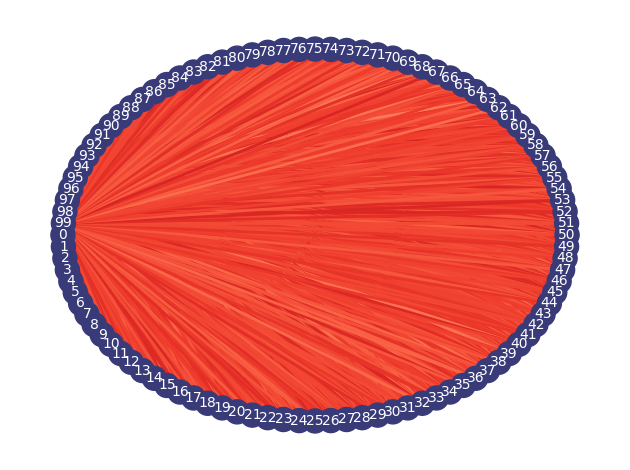

In [15]:
G = read_input('./inputs/small1.in')
visualize(G)

In [16]:
# test delete later
def write_input_test(G: nx.Graph, path: str, overwrite: bool=False):
    assert overwrite or not os.path.exists(path), \
        'File already exists and overwrite set to False. Move file or set overwrite to True to proceed.'
    with open(path, 'w') as fp:
        json.dump(nx.node_link_data(G), fp)

def read_input_test(path: str):
    def validate_graph(G: nx.Graph):
        assert not G.is_directed(), 'G should not be directed'
        assert set(G) == set(range(G.number_of_nodes())), 'Nodes must be numbered from 0 to n-1'
        return True
    
    def validate_input(G: nx.Graph):
        for n, d in G.nodes(data=True):
            assert not d, 'Nodes cannot have data'
        for u, v, d in G.edges(data=True):
            assert u != v, 'Edges should be between distinct vertices (a penguin is experiencing inner-conflict)'
            assert set(d) == {'weight'}, 'Edge must only have weight data'
            assert isinstance(d['weight'], int), 'Edge weights must be integers'
            assert d['weight'] > 0, 'Edge weights must be positive'
            # assert d['weight'] <= MAX_WEIGHT, f'Edge weights cannot be greater than {MAX_WEIGHT}'
        # assert G.number_of_edges() <= MAX_EDGES, 'Graph has too many edges'
        # assert sum(d for u, w, d in G.edges(data='weight')) >= MAX_WEIGHT*MAX_EDGES*0.05, \
            # f'There must be at least {MAX_WEIGHT*MAX_EDGES*0.05} edge weight in the input.'
        assert not G.is_multigraph()
        return validate_graph(G)
    
    # assert os.path.getsize(path) < INPUT_SIZE_LIMIT, 'This input file is too large'
    with open(path) as fp:
        G = nx.node_link_graph(json.load(fp), multigraph=False)
        if validate_input(G):
            return G

G = nx.empty_graph(12)
test(G)
write_input_test(G, 'test.in')

G = read_input_test('test.in')
print(f'read and visualize input {visualize(G)}')

def get_cluster(G: nx.Graph) -> nx.Graph:
   """
   Input G should be a copy, we should not modify the original graph
   if check, return G; else, separate into clusters and return those
   """
   def check(G: nx.Graph, E: set):
      """Needs more than 1/2 of nodes to cluster"""
      print(len(E), G.number_of_nodes() // 2)
      return len(E) > G.number_of_nodes() // 2
      
   
   E = nx.algorithms.connectivity.cuts.minimum_edge_cut(G)
   if not check(G, E):
      # remove edges in E
      for e in E:
         G.remove_edge(*e)
      clusters = [G.subgraph(c).copy() for c in nx.connected_components(G)]
      if len(clusters) == 2:
         res = get_cluster(clusters[0])
         res1 = get_cluster(clusters[1])

         G = nx.compose(res, res1)
   
   return G

subgraphs = get_cluster(G)
visualize(subgraphs)




AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

In [17]:
# 4 by 4 case from homework
def four_by_four():
    test = nx.empty_graph(16)
    for i in range(0, 3):
        test.add_edge(i, i+1, weight=100)
        test.add_edge(i+4, i+4+1, weight=100)
        test.add_edge(i+8, i+8+1, weight=100)
        test.add_edge(i+12, i+12+1, weight=100)
        test.add_edge(i*4, (i+1)*4, weight = 100)
        test.add_edge((i*4)+1, ((i+1)*4) + 1, weight = 100)
        test.add_edge((i*4)+2, ((i+1)*4) + 2, weight = 100)
        test.add_edge((i*4)+3, ((i+1)*4) + 3, weight = 100)
    return test


In [18]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [19]:
import networkx as nx
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from pathlib import Path
from tqdm.auto import tqdm
import tarfile
from starter import *
import random

# fill random teamless nodes with min total team + yes team_sizes[old_team] -= 1
# def solve(G: nx.Graph):
#     min_score = float("inf")
#     for _ in range(3):
#         G_copy = G.copy()
#         solve(G_copy)
#         temp_score = score(G_copy)
#         if temp_score < min_score:
#             min_score = temp_score
#             min_G = G_copy.copy()
#     for i in G.nodes:
#         G.nodes[i]["team"] = min_G.nodes[i]["team"]

def solve_greedy(G: nx.Graph):
    def new_first(G, curr, old_team, new_team, old_first):
        for z in G.neighbors(curr):
            if G.nodes[z]["team"] == old_team:
                old_first -= G[curr][z]["weight"]
            if G.nodes[z]["team"] == new_team:
                old_first += G[curr][z]["weight"]
        return old_first

    def new_third(team_sizes, old_team, new_team, old_third, V, k):
        old_b = (math.log(old_third))/B_EXP
        b_i = (team_sizes[old_team]/V) - (1/k)
        b_j = (team_sizes[new_team]/V) - (1/k)
        rad = ((old_b**2) - (b_i**2) - (b_j**2) + (b_i - (1/V))**2 + (b_j + (1/V))**2)
        if rad < 0:
            rad = 0
        return math.exp(B_EXP*math.sqrt(rad))

    V = G.number_of_nodes()
    upper_k = 2*int(((V+1)**(1/2)))
    min_cost = float("inf")
    min_G = G.copy()
    possible_k = range(1, upper_k)
    nodes = sorted(G.degree(weight="weight"), key=lambda x: x[1])
    biggest_node = sorted(G.degree(weight="weight"), key=lambda x: x[1])[-1][0]

    for k in possible_k:
        G_copy = G.copy()
        team_sizes = {i:0 for i in range(1, k+1)}
        '''
        RANDOMLY ASSIGN TEAMS TO NODES
        '''
        for i in range(V):
            team = random.choice(range(1, k+1))
            G_copy.nodes[i]["team"] = team
            team_sizes[team] += 1
        # '''
        # ITERATE THROUGH SORTED NODES AND ASSIGN TEAMS TO MIN_TOT_TEAM
        # '''
        # queue = [i[0] for i in nodes]
        # for curr in queue:
        #     old_team = G_copy.nodes[curr]["team"]
        #     edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
        #     adj_team_counter = {i:0 for i in range(1, k+1)}
        #     for i in edges:
        #         neighbor = i[1]
        #         if "team" in G_copy.nodes[neighbor]:
        #             adj_team = G_copy.nodes[neighbor]["team"]
        #             adj_team_counter[adj_team] += i[2]["weight"]
        #     smallest_team = min(adj_team_counter, key=adj_team_counter.get)
        #     G_copy.nodes[curr]["team"] = smallest_team
        #     team_sizes[smallest_team] += 1
        # '''
        # DFS TO INITIALIZE ALL G_COPY NODES TO MIN_ADJ_TEAM 
        # '''
        # queue = [biggest_node]
        # visited = [False for _ in range(V)]
        # while queue:
        #     curr = queue.pop()
        #     old_team = G_copy.nodes[curr]["team"]
        #     if not visited[curr]:
        #         edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
        #         adj_team_counter = {i:0 for i in range(1, k+1)}
        #         for i in edges:
        #             neighbor = i[1]
        #             if "team" in G_copy.nodes[neighbor]:
        #                 adj_team = G_copy.nodes[neighbor]["team"]
        #                 adj_team_counter[adj_team] += i[2]["weight"]
        #             if not visited[neighbor]:
        #                 queue.append(neighbor)
        #         smallest_team = min(adj_team_counter, key=adj_team_counter.get)
        #         G_copy.nodes[curr]["team"] = smallest_team
        #         team_sizes[smallest_team] += 1
        #         team_sizes[old_team] -= 1
        #         visited[curr] = True
        '''
        DFS AND ASSIGN NODES BY CHOOSING BETWEEN MIN_ADJ_TEAM AND MIN_TOT_TEAM
        '''
        for _ in range(k):
            curr_first, curr_second, curr_third = score(G_copy, separated=True)
            curr_score = curr_first + curr_second + curr_third
            visited = [False for _ in range(V)]
            queue = [biggest_node]
            while queue:
                curr = queue.pop()
                if not visited[curr]:
                    edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
                    adj_team_counter = {i:0 for i in range(1, k+1)}
                    for i in edges:
                        neighbor = i[1]
                        if "team" in G_copy.nodes[neighbor]:
                            adj_team = G_copy.nodes[neighbor]["team"]
                            adj_team_counter[adj_team] += i[2]["weight"]
                        if not visited[neighbor]:
                            queue.append(neighbor)
                    
                    # HOW DO WE CHOOSE BETWEEN MIN_ADJ_TEAM AND MIN_TOT_TEAM ?
                    old_team = G_copy.nodes[curr]["team"]
                    min_adj_team = min(adj_team_counter, key=adj_team_counter.get)
                    min_tot_team = min(team_sizes, key=team_sizes.get)
                    
                    adj_first = new_first(G_copy, curr, old_team, min_adj_team, curr_first)
                    adj_third = new_third(team_sizes, old_team, min_adj_team, curr_third, V, k)
                    adj_score = adj_first + curr_second + adj_third

                    tot_first = new_first(G_copy, curr, old_team, min_tot_team, curr_first)
                    tot_third = new_third(team_sizes, old_team, min_tot_team, curr_third, V, k)
                    tot_score = tot_first + curr_second + tot_third

                    if adj_score < curr_score:
                        G_copy.nodes[curr]["team"] = min_adj_team
                        team_sizes[min_adj_team] += 1
                        team_sizes[old_team] -= 1
                        curr_first = adj_first
                        curr_third = adj_third
                        curr_score = adj_score
                    old_team = G_copy.nodes[curr]["team"]
                    if tot_score < curr_score:
                        G_copy.nodes[curr]["team"] = min_tot_team
                        team_sizes[min_tot_team] += 1
                        team_sizes[old_team] -= 1
                        curr_first = tot_first
                        curr_third = tot_third
                        curr_score = tot_score
                    visited[curr] = True
        # '''
        # ITERATE THROUGH SORTED NODES AND ASSIGN TEAMS TO MIN_TOT_TEAM
        # '''
        for _ in range(k):
            queue = [i[0] for i in nodes]
            for curr in queue:
                curr_first, curr_second, curr_third = score(G_copy, separated=True)
                curr_score = curr_first + curr_second + curr_third
                edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
                adj_team_counter = {i:0 for i in range(1, k+1)}
                for i in edges:
                    neighbor = i[1]
                    adj_team = G_copy.nodes[neighbor]["team"]
                    adj_team_counter[adj_team] += i[2]["weight"]
                old_team = G_copy.nodes[curr]["team"]
                min_adj_team = min(adj_team_counter, key=adj_team_counter.get)
                min_tot_team = min(team_sizes, key=team_sizes.get)
                
                adj_first = new_first(G_copy, curr, old_team, min_adj_team, curr_first)
                adj_third = new_third(team_sizes, old_team, min_adj_team, curr_third, V, k)
                adj_score = adj_first + curr_second + adj_third


                tot_first = new_first(G_copy, curr, old_team, min_tot_team, curr_first)
                tot_third = new_third(team_sizes, old_team, min_tot_team, curr_third, V, k)
                tot_score = tot_first + curr_second + tot_third

                if adj_score < curr_score:
                    G_copy.nodes[curr]["team"] = min_adj_team
                    team_sizes[min_adj_team] += 1
                    team_sizes[old_team] -= 1
                    curr_first = adj_first
                    curr_third = adj_third
                    curr_score = adj_score
                old_team = G_copy.nodes[curr]["team"]
                if tot_score < curr_score:
                    G_copy.nodes[curr]["team"] = min_tot_team
                    team_sizes[min_tot_team] += 1
                    team_sizes[old_team] -= 1
                    curr_first = tot_first
                    curr_third = tot_third
                    curr_score = tot_score
                    
        curr_cost = score(G_copy)
        if curr_cost <= min_cost:
            min_cost = curr_cost
            min_G = G_copy.copy()
        else:break
    for i in min_G.nodes:
        G.nodes[i]['team'] = min_G.nodes[i]['team']
    return G

In [37]:
import networkx as nx
import random
from starter import *
import math

def solve_greedy(G: nx.Graph):
    def get_teams(G: nx.Graph):
        teams = {}
        for node in G.nodes:
            # print(f"G.nodes[node]['team']:   {G.nodes[node]}")
            if not G.nodes[node]: # no team is originally assigned, there should be no team 0's though..
                teams[0] = [node]
            else:
                id = G.nodes[node]['team']
                if id not in teams:
                    teams[id] = [node]
                else:
                    teams[id].append(node)
        return teams
    # input can be 3 cases:
    #   1) unchanged input            (old_graph)
    #   2) input but with 1 more team (new_graph_with1)
    #   3) input but with 1 less team (new_graph_with-1)
    # first, fix any disputes within same team if any and if possible
    #   find pairs of nodes with internal disputes
    #   then, randomly put these into teams where there won't be disputes
    # this will be our starting state
    # We will run an arbritary amount of iterations to even out the number of nodes in each team
    #   so we can have different permutations of teams
    #   we record the scores for each and take the best

    # find and reassign disputes
    G_copy = G.copy()
    teams = get_teams(G)
    seen_pairs = set()
    for id in teams:
        nodes = teams[id]
        available_teams = list(teams.keys())
        available_teams.remove(id)
        for compare_node in teams[id]:
            for node in teams[id]:
                if G.has_edge(compare_node, node) and node != compare_node and (compare_node, node) not in seen_pairs and (node, compare_node) not in seen_pairs:
                    reassign = random.choice([compare_node, node])
                    team_id = random.choice(available_teams)
                    G_copy.nodes[node]['team'] = team_id
                    seen_pairs.add((compare_node, node))
                    seen_pairs.add((node, compare_node))
    
    print("solved disputes:")
    visualize(G_copy)
    print(f"teams: {get_teams(G_copy)}")
    


class SimulatedAnnealing:
    def __init__(self, initialSolution, solutionEvaluator, initialTemp, finalTemp, tempReduction, neighborOperator, iterationPerTemp=100, alpha=10, beta=5):
        self.solution = initialSolution
        self.evaluate = solutionEvaluator
        self.currTemp = initialTemp
        self.finalTemp = finalTemp
        self.iterationPerTemp = iterationPerTemp
        self.alpha = alpha
        self.beta = beta
        self.neighborOperator = neighborOperator

        if tempReduction == "linear":
            self.decrementRule = self.linearTempReduction
        elif tempReduction == "geometric":
            self.decrementRule = self.geometricTempReduction
        elif tempReduction == "slowDecrease":
            self.decrementRule = self.slowDecreaseTempReduction
        else:
            self.decrementRule = tempReduction

    def linearTempReduction(self):
        self.currTemp -= self.alpha

    def geometricTempReduction(self):
        self.currTemp *= self.alpha

    def slowDecreaseTempReduction(self):
        self.currTemp = self.currTemp / (1 + self.beta * self.currTemp)

    def isTerminationCriteriaMet(self):
        # can add more termination criteria
        # return self.currTemp <= self.finalTemp or self.neighborOperator(self.solution) == 0
        return self.currTemp < self.finalTemp

    def run(self):
        G_copy = None
        while not self.isTerminationCriteriaMet():
            # iterate that number of times
            for i in range(self.iterationPerTemp):
                # get all of the neighbors (return a list)
                neighbors = self.neighborOperator(self.solution)
                # pick a random neighbor (pick randomly whether to increase/decrease partition)
                newSolution = random.choice(neighbors)
                # get the cost between the two solutions
                old_graph, new_graph = self.evaluate(self.solution), self.evaluate(newSolution)
                cost = score(old_graph) - score(new_graph)
                # if the new solution is better, accept it
                if cost >= 0:
                    self.solution = newSolution
                    G_copy = new_graph
                    print(f"Current graph replaced with better one: {G_copy}")
                    # print("visualize")
                    # visualize(G_copy)
                # if the new solution is not better, accept it with a probability of e^(-cost/temp)
                else:
                    print(f"new graph is worse, printing new k")
                    print(self.currTemp)
                    if random.uniform(0, 1) < math.exp(-cost / self.currTemp):
                        self.solution = newSolution
                        G_copy = new_graph
            # decrement the temperature
            self.decrementRule()

        # return self.solution
        return G_copy


def solve_sa_main(G: nx.Graph):
    """Simulated Annealing solution"""

    def initial_solution(G: nx.Graph):
        """
        # randomly choose a partition number k (1 to |V|) and
        # make a graph (does not have to be optimal)
        # This means this function will make teams randomly
        #   ie randomly assign each node a team but each team will at least have one node
        #   if k == |V| is an edge case
        # Since we cannot just randomly assign teams (this can possibly get us teams with no members),
        # we record which teams the nodes are randomly assigned to.
        # Then, after all nodes are assigned, we check if there are teams with no members;
        # if there are teams with no members, we randomly pick from teams with at least 2 members and
        # reassign them to these teams.
        
        # returns Graph and number of teams/partitions
        """

        k = random.randint(2, G.number_of_nodes() - 1) # should not start with 1 since neighbor operator needs at least 2 teams for swap
        teams = {i: [] for i in range(1, k + 1)}
        G_copy = G.copy()
        i, count = 1, 0
        for node in G_copy:
            # add to every team at least once
            if count < len(teams):
                G_copy.nodes[node]['team'] = i
                teams[i].append(node)
                i += 1
                count += 1
            # the rest is added to random teams
            id = random.randint(1, k)
            G_copy.nodes[node]['team'] = id
            teams[id].append(node)

        # find teams with no members if any
        teams_with_0 = []
        # teams_with_2more = {}
        # for id in teams:
        #     if teams[id] == []:
        #         teams_with_0.append(id)
        #     elif len(teams[id]) >= 2:
        #         teams_with_2more[id] = teams[id]
        return G_copy, len(teams)
        if not teams_with_0:
            return G_copy, len(teams)
        else:
            # randomly choose from teams with 2 or more
            # from that team, randomly choose teammates
            reassign_nodes = []
            amount_choose = len(teams_with_0)
            while amount_choose:
                id = random.choice(list(teams_with_2more.keys()))
                reassign = random.choice(teams_with_2more[id])
                reassign_nodes.append((id, reassign))
                
                if len(teams_with_2more[id]) >= 1:
                    teams_with_2more[id].remove(reassign)
                    if len(teams_with_2more[id]) == 0:
                        del teams_with_2more[id]

                amount_choose -= 1

            # reassign nodes and assign same teams to nodes
            G_copy = G.copy()
            for id, node in reassign_nodes:
                G_copy.nodes[node]['team'] = id
            for id in teams_with_2more:
                for node in teams_with_2more[id]:
                    G_copy.nodes[node]['team'] = id
            
            return G_copy, len(get_teams(G_copy))

    def get_teams(G: nx.Graph):
        teams = {}
        for node in G.nodes:
            # print(f"G.nodes[node]['team']:   {G.nodes[node]}")
            if not G.nodes[node]: # no team is originally assigned, there should be no team 0's though..
                teams[0] = [node]
            else:
                id = G.nodes[node]['team']
                if id not in teams:
                    teams[id] = [node]
                else:
                    teams[id].append(node)
        return teams
    
    def neighbor_operator(G: nx.Graph):
        """
        Randomly choose whether to increase or decrease partitions by 1.
        Make sure graph is changed accordingly. There should be at least 1 member for each team.
        """
        change = random.randint(0, 1)
        G_copy = G.copy()
        teams = get_teams(G_copy)
        if change:
            # choose a random team to add
            available_teams = []
            for i in range(1, max(list(teams.keys()))):
                if i not in teams:
                    available_teams.append(i)
            add_teamid = random.choice(available_teams)

            # randomly choose how many nodes to add to new team
            # there should be at least 1
            teams_withatleast2 = []
            for i in teams:
                if len(teams[i]) >= 2:
                    teams_withatleast2.append(i)
            add_fromteam = random.choice(teams[random.choice(teams_withatleast2)])
            G_copy.nodes[add_fromteam]['team'] = add_teamid
            
            print("add")
            visualize(G_copy)
        else:
            # choose a random team to get rid of/
            available_teams = []
            for i in range(1, max(list(teams.keys()))):
                if i in teams:
                    available_teams.append(i)
            remove_teamid = random.choice(available_teams)
            remove_fromteam = teams[remove_teamid]

            # randomly choose a team to add the soon-to-be-removed team's nodes to
            available_teams.remove(remove_teamid)
            reassign = random.choice(available_teams)
            for node in remove_fromteam:
                G_copy.nodes[node]['team'] = reassign

            print("remove")
            visualize(G_copy)

        return G_copy


    # only runs this once
    # should run this indefinitely and record the solutions and change if there is a better solution
    #   run all inputs and record their solutions
    #   run all inputs again and record their solutions wrt input number and if any of them is better, replace
    
    initialSolution, initialTemp = initial_solution(G)
    print(f"initial temp: {initialTemp} and initial solution visualized below")
    print(f"initial teams = {get_teams(initialSolution)}")
    visualize(initialSolution)
    # initialTemp = initial_temp(G)
    finalTemp = 10
    tempReduction = "linear"
    iterationPerTemp = 10 * G.number_of_nodes() # arbritary number
    alpha = 1

    solve_greedy(initialSolution)
    return
    # res = neighbor_operator(initialSolution)
    # print(f"neighbor teams = {get_teams(res)}")
    sa = SimulatedAnnealing(initialSolution=initialSolution, solutionEvaluator=solve_greedy, initialTemp=initialTemp, finalTemp=finalTemp, tempReduction=tempReduction, neighborOperator=neighbor_operator, iterationPerTemp=iterationPerTemp, alpha=alpha)
    sol = sa.run()
    teams = get_teams(sol)
    for id in teams:
        for node in teams[id]:
            G.nodes[node]['team'] = id
    return
    # change iterationPerTemp later!!

initial temp: 13 and initial solution visualized below
initial teams = {3: [0, 11], 10: [1, 6, 9, 10], 7: [2, 13, 15], 9: [3, 14], 2: [4, 12], 6: [5], 8: [7], 11: [8]}


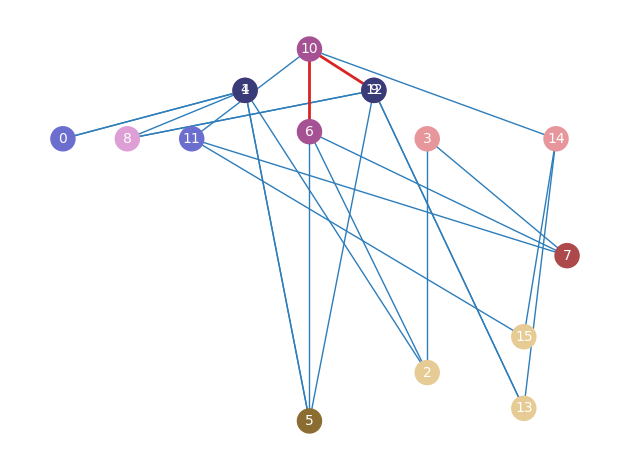

solved disputes:


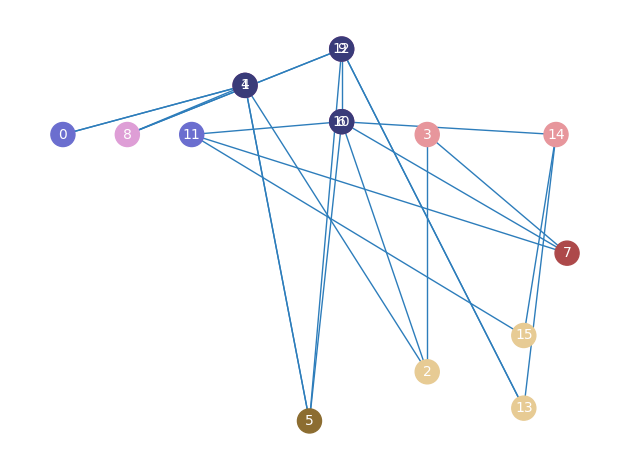

teams: {3: [0, 11], 10: [1, 6, 9], 7: [2, 13, 15], 9: [3, 14], 2: [4, 10, 12], 6: [5], 8: [7], 11: [8]}


In [42]:
# from greedy import *
# from solve_sa import *
# from simulated_annealing import *

# four by four solve
G_fourbyfour = four_by_four()
solve_sa_main(G_fourbyfour)
# validate_output(G_fourbyfour)
# visualize(G_fourbyfour)
# score(G_fourbyfour)

In [12]:
G = read_input('example.in')
# solve_clean(G)
# solve_2_hard(G)
# print()
# print(list(nx.dominating_set(G)))
solve_sa_main(G)
validate_output(G)
visualize(G)
score(G)

initial temp: 50
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize
Current graph replaced with better one: Graph with 50 nodes and 1000 edges
visualize


KeyboardInterrupt: 

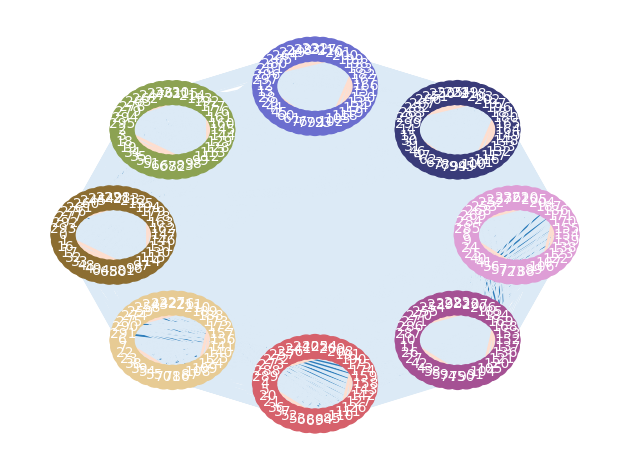

29222.802483676758

In [40]:
# DONT DELETE
# G = read_input('./inputs/small1.in')
G = read_input('medium78.in')
# print(list(nx.dominating_set(G)))
# print()
# solve_2(G)
solve_2_hard(G)
validate_output(G)
visualize(G)
score(G)

In [43]:
# run(solve_clean, 'small.in', 'small.out')
# previous avg rank scores (recent first): 18.594871794871796, 18.57948717948718, 18.553846153846155, 18.52820512820513

In [92]:
# avg_scores = run_all(solve_clean, 'inputs', 'outputs')
# print(f'average scores for large, medium, small: {avg_scores}')
# tar('outputs')

run_all(solve_sa_main, 'inputs', 'outputs')
tar('outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

solving input file: inputs/large225.in


KeyboardInterrupt: 